In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/Credit_Data.csv')
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
df.dtypes

,0
ID,int64
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Education,int64
Gender,object
Student,object
Married,object


In [ ]:
df.isna().sum()

,0
ID,0
Income,0
Limit,0
Rating,0
Cards,0
Age,0
Education,0
Gender,0
Student,0
Married,0


In [ ]:
df.columns

Index(['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [ ]:
df=pd.get_dummies(df,columns=['Gender','Student','Married','Ethnicity'],drop_first=True)

In [ ]:
df.columns

Index(['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Balance', 'Gender_Male', 'Student_Yes', 'Married_Yes',
       'Ethnicity_Asian', 'Ethnicity_Caucasian'],
      dtype='object')

In [ ]:
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,True,False,True,False,True
1,2,106.025,6645,483,3,82,15,903,False,True,True,True,False
2,3,104.593,7075,514,4,71,11,580,True,False,False,True,False
3,4,148.924,9504,681,3,36,11,964,False,False,False,True,False
4,5,55.882,4897,357,2,68,16,331,True,False,True,False,True


In [ ]:
X=df.drop('Balance',axis=1)
y=df['Balance']
print(X.shape)
print(y.shape)

(400, 12)
(400,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
columns_to_scale = ['Income','Limit','Rating']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
# lasso_model = Lasso(alpha=0.1)
# lasso_model.fit(X_train, y_train)

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.952325267721301
7965.1891210417425


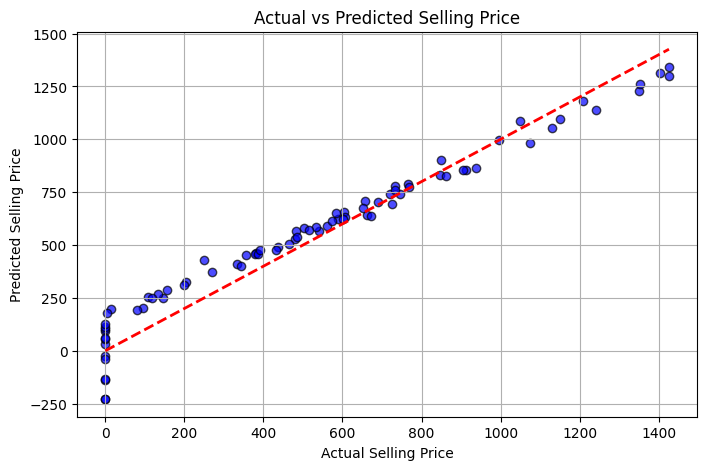

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
df1=pd.read_csv('/content/Credit_Data.csv')
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,True,False,True,False,True
1,2,106.025,6645,483,3,82,15,903,False,True,True,True,False
2,3,104.593,7075,514,4,71,11,580,True,False,False,True,False
3,4,148.924,9504,681,3,36,11,964,False,False,False,True,False
4,5,55.882,4897,357,2,68,16,331,True,False,True,False,True


In [ ]:
df1=pd.get_dummies(df1,columns=['Gender','Student','Married','Ethnicity'],drop_first=True)

In [ ]:
df1.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,True,False,True,False,True
1,2,106.025,6645,483,3,82,15,903,False,True,True,True,False
2,3,104.593,7075,514,4,71,11,580,True,False,False,True,False
3,4,148.924,9504,681,3,36,11,964,False,False,False,True,False
4,5,55.882,4897,357,2,68,16,331,True,False,True,False,True


In [ ]:
X=df1.drop('Balance',axis=1)
y=df1['Balance']
print(X.shape)
print(y.shape)

(400, 12)
(400,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42        # For reproducibility
)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
import numpy as np

In [ ]:
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
mse=mean_squared_error(y_test, y_pred_rf)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
rmse=np.sqrt(mse)
print(mse)
print(rmse)

Random Forest R²: 0.9168298129193878
Random Forest MAE: 77.999125
13895.54251625
117.8793557678782


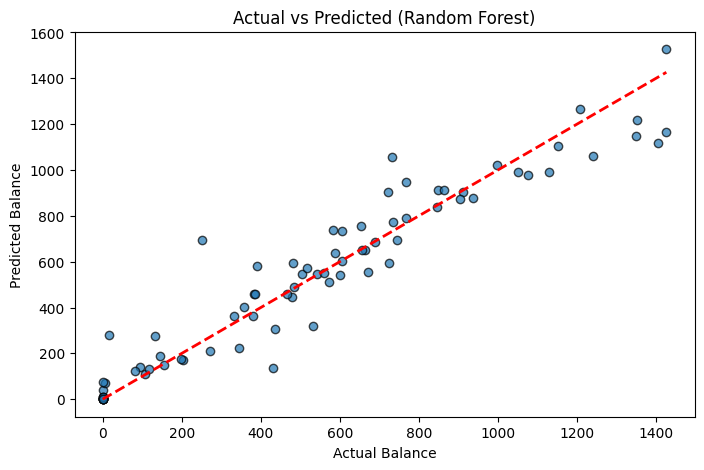

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()


In [ ]:
df2=pd.read_csv('/content/Credit_Data.csv')
df2.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
df2=pd.get_dummies(df2, columns=['Gender','Student','Married','Ethnicity'],drop_first=True)


In [ ]:
df2.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,True,False,True,False,True
1,2,106.025,6645,483,3,82,15,903,False,True,True,True,False
2,3,104.593,7075,514,4,71,11,580,True,False,False,True,False
3,4,148.924,9504,681,3,36,11,964,False,False,False,True,False
4,5,55.882,4897,357,2,68,16,331,True,False,True,False,True


In [ ]:
X=df2.drop('Rating',axis=1)
y=df2['Rating']
print(X.shape)
print(y.shape)

(400, 12)
(400,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1, random_state=42 )

In [ ]:
scaler=StandardScaler()
columns_to_scale = ['Income','Limit']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
# model=Ridge()
# model.fit(X_train,y_train)

In [ ]:
model=Lasso()
model.fit(X_train,y_train)

Lasso()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9954212913571401
72.06491059394573


In [ ]:
# Training accuracy
train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
print(train_r2)

0.9954354633372914


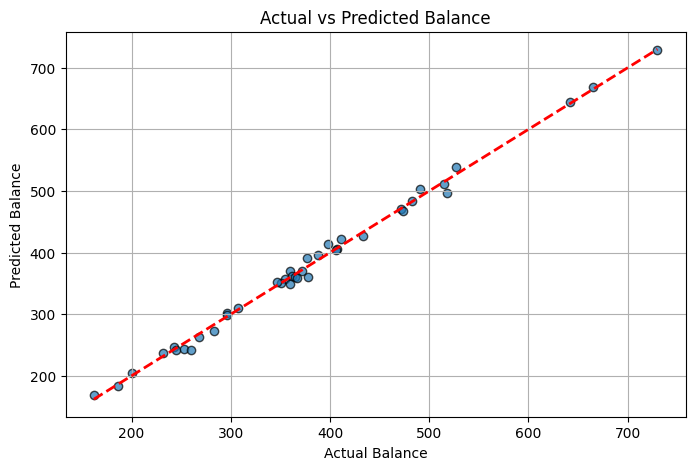

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = poly_model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9906447199558361
147.2440097308505


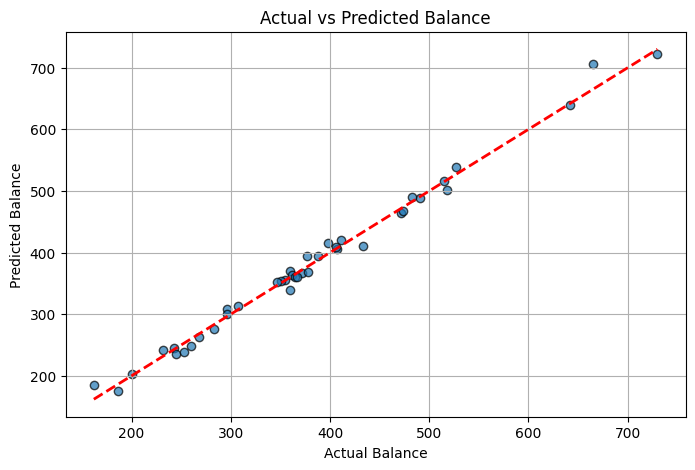

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9875070611472765
196.62804334167325


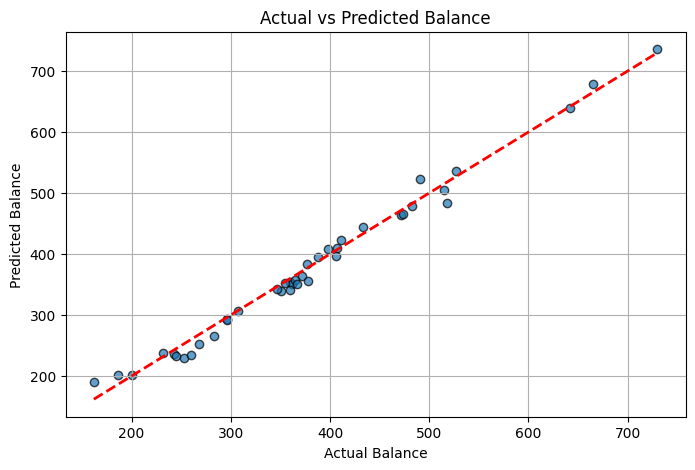

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = model.predict(X_test)

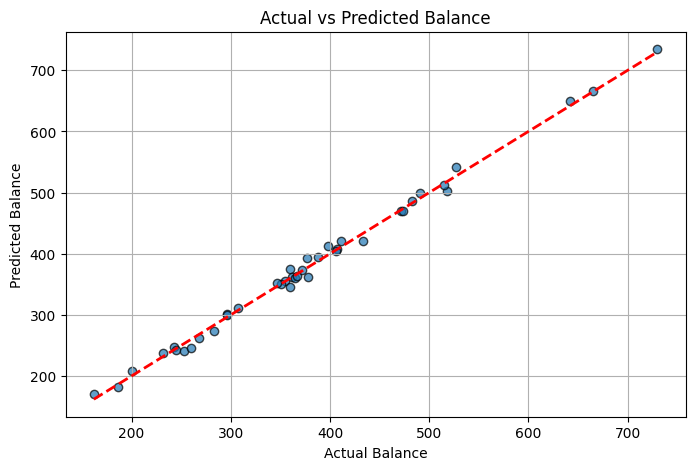

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import QuantileRegressor

In [ ]:
model = QuantileRegressor(quantile=0.5, alpha=0)
model.fit(X_train, y_train)

QuantileRegressor(alpha=0)

In [ ]:
y_pred = model.predict(X_test)

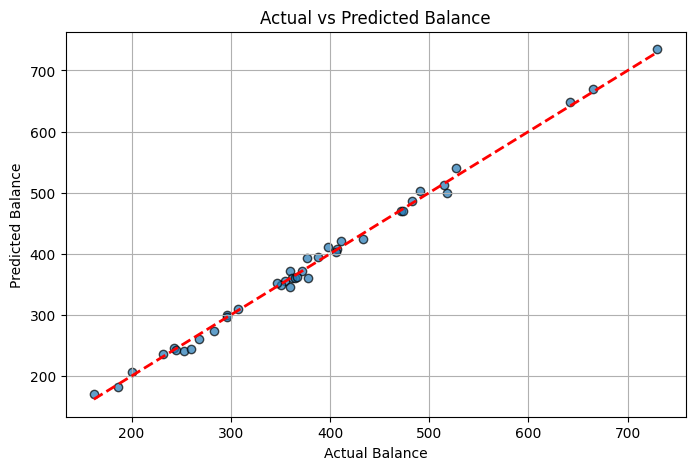

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train, y_train)

SVR(C=100)

In [ ]:
y_pred = model.predict(X_test)

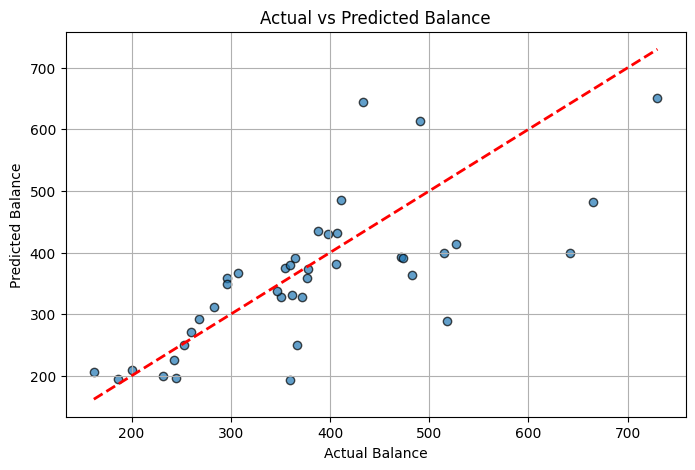

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance")
plt.grid(True)
plt.show()
